**Data preparation, saving all comments in one variable.**

In [0]:
import pandas as pd
import numpy as np


In [2]:
data1= pd.read_excel("/content/Amazon.xlsx")
data1
data2=data1.comb_review
m=0
a=""
for i in data2:
  
  a= a+" "+str(i) 
print(a)


 One Star The arrives Five Stars Awesome item ! It’s nice to have unlimited water It’s nice to have unlimited water. Think there is to many filters for me because the water tastes like distilled water which makes myself more thirsty. Other than that I am happy for the most part. "READ AND FOLLOW" the Instructions for setup to avoid any problems with the setup. We ordered 2 of these water dispenser and coolers for our Company - one of the office and one for our warehouse work area to fill the need of water supply for 2 large groups of employees in two separate work areas. Trying to eliminate the chore of having to purchase cases of bottle water several times a week! Set up a water delivery service and decided it would be better to purchase the cooler rather than paying a monthly rental fee on top of the water delivery service! Turns out to be a wise and cost effective purchase. This is a well known brand and has been very welcomed in the office. Unpacked, plugged in, loaded a bottle of 

In [0]:
text=a.lower()

**Importing NLTK Libraries**

In [0]:

import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

**Tokenizing Sentences, THIS CAN BE SKIPPED**

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
tokenized_text=sent_tokenize(text)

In [7]:
print(tokenized_text)

[' one star the arrives five stars awesome item !', 'it’s nice to have unlimited water it’s nice to have unlimited water.', 'think there is to many filters for me because the water tastes like distilled water which makes myself more thirsty.', 'other than that i am happy for the most part.', '"read and follow" the instructions for setup to avoid any problems with the setup.', 'we ordered 2 of these water dispenser and coolers for our company - one of the office and one for our warehouse work area to fill the need of water supply for 2 large groups of employees in two separate work areas.', 'trying to eliminate the chore of having to purchase cases of bottle water several times a week!', 'set up a water delivery service and decided it would be better to purchase the cooler rather than paying a monthly rental fee on top of the water delivery service!', 'turns out to be a wise and cost effective purchase.', 'this is a well known brand and has been very welcomed in the office.', 'unpacked,

**Word Tokenizer to break each words**

In [0]:
tokenized_word=word_tokenize(text)

In [9]:
print(tokenized_word)

['one', 'star', 'the', 'arrives', 'five', 'stars', 'awesome', 'item', '!', 'it', '’', 's', 'nice', 'to', 'have', 'unlimited', 'water', 'it', '’', 's', 'nice', 'to', 'have', 'unlimited', 'water', '.', 'think', 'there', 'is', 'to', 'many', 'filters', 'for', 'me', 'because', 'the', 'water', 'tastes', 'like', 'distilled', 'water', 'which', 'makes', 'myself', 'more', 'thirsty', '.', 'other', 'than', 'that', 'i', 'am', 'happy', 'for', 'the', 'most', 'part', '.', '``', 'read', 'and', 'follow', "''", 'the', 'instructions', 'for', 'setup', 'to', 'avoid', 'any', 'problems', 'with', 'the', 'setup', '.', 'we', 'ordered', '2', 'of', 'these', 'water', 'dispenser', 'and', 'coolers', 'for', 'our', 'company', '-', 'one', 'of', 'the', 'office', 'and', 'one', 'for', 'our', 'warehouse', 'work', 'area', 'to', 'fill', 'the', 'need', 'of', 'water', 'supply', 'for', '2', 'large', 'groups', 'of', 'employees', 'in', 'two', 'separate', 'work', 'areas', '.', 'trying', 'to', 'eliminate', 'the', 'chore', 'of', 'hav

**Plooting Frequency of Words, plotting 30 high freq words**

In [10]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 2332 samples and 23355 outcomes>


In [0]:
fdist.most_common(20)

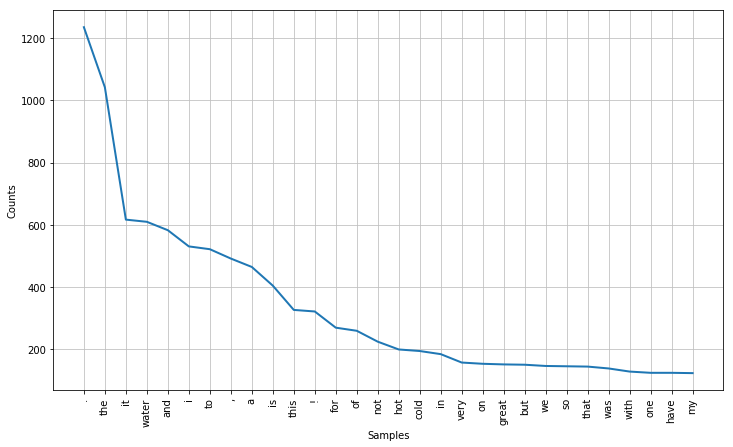

In [12]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Stopwords**

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words=set(stopwords.words("english"))

In [0]:
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)

In [16]:
print("Filterd Words:",filtered_word[:100])

Filterd Words: ['one', 'star', 'arrives', 'five', 'stars', 'awesome', 'item', '!', '’', 'nice', 'unlimited', 'water', '’', 'nice', 'unlimited', 'water', '.', 'think', 'many', 'filters', 'water', 'tastes', 'like', 'distilled', 'water', 'makes', 'thirsty', '.', 'happy', 'part', '.', '``', 'read', 'follow', "''", 'instructions', 'setup', 'avoid', 'problems', 'setup', '.', 'ordered', '2', 'water', 'dispenser', 'coolers', 'company', '-', 'one', 'office', 'one', 'warehouse', 'work', 'area', 'fill', 'need', 'water', 'supply', '2', 'large', 'groups', 'employees', 'two', 'separate', 'work', 'areas', '.', 'trying', 'eliminate', 'chore', 'purchase', 'cases', 'bottle', 'water', 'several', 'times', 'week', '!', 'set', 'water', 'delivery', 'service', 'decided', 'would', 'better', 'purchase', 'cooler', 'rather', 'paying', 'monthly', 'rental', 'fee', 'top', 'water', 'delivery', 'service', '!', 'turns', 'wise', 'cost']


In [0]:
fdist = FreqDist(filtered_word)

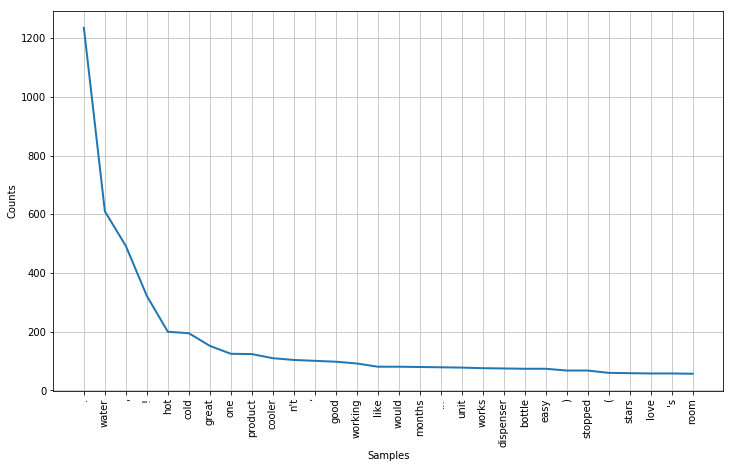

In [19]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Removing Punctuations**

In [0]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]

**Removing Non-Alphabetic Tokens**

In [0]:
filtered_words = [word for word in stripped if word.isalpha()]

**Plotting Filtered Words**

In [0]:
fdist = FreqDist(filtered_words)


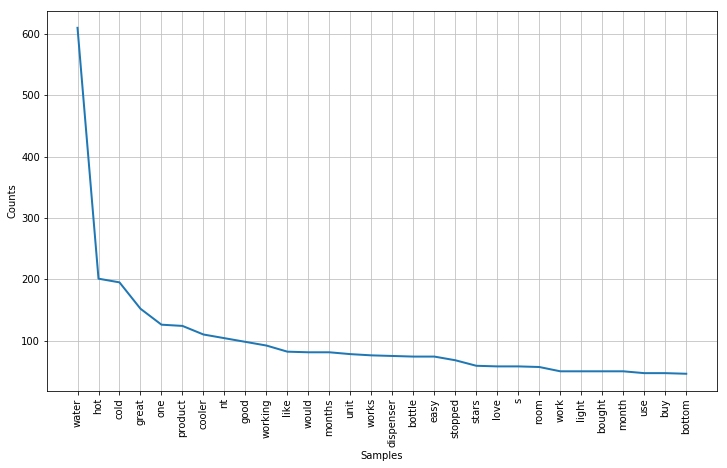

In [23]:
plt.figure(figsize=(12, 7))
fdist.plot(30,cumulative=False)
plt.show()

**Lexicon Normalization, Stemming and Lemmatization**

In [0]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

In [25]:
print("Stemmed Words:",stemmed_words[:100])

Stemmed Words: ['one', 'star', 'arriv', 'five', 'star', 'awesom', 'item', 'nice', 'unlimit', 'water', 'nice', 'unlimit', 'water', 'think', 'mani', 'filter', 'water', 'tast', 'like', 'distil', 'water', 'make', 'thirsti', 'happi', 'part', 'read', 'follow', 'instruct', 'setup', 'avoid', 'problem', 'setup', 'order', 'water', 'dispens', 'cooler', 'compani', 'one', 'offic', 'one', 'warehous', 'work', 'area', 'fill', 'need', 'water', 'suppli', 'larg', 'group', 'employe', 'two', 'separ', 'work', 'area', 'tri', 'elimin', 'chore', 'purchas', 'case', 'bottl', 'water', 'sever', 'time', 'week', 'set', 'water', 'deliveri', 'servic', 'decid', 'would', 'better', 'purchas', 'cooler', 'rather', 'pay', 'monthli', 'rental', 'fee', 'top', 'water', 'deliveri', 'servic', 'turn', 'wise', 'cost', 'effect', 'purchas', 'well', 'known', 'brand', 'welcom', 'offic', 'unpack', 'plug', 'load', 'bottl', 'water', 'readi', 'go', 'employe']


**Trying Lemmatization**

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))

In [28]:
print("Lemmatize Words:",lemma_words[:100])

Lemmatize Words: ['one', 'star', 'arrives', 'five', 'star', 'awesome', 'item', 'nice', 'unlimited', 'water', 'nice', 'unlimited', 'water', 'think', 'many', 'filter', 'water', 'taste', 'like', 'distilled', 'water', 'make', 'thirsty', 'happy', 'part', 'read', 'follow', 'instruction', 'setup', 'avoid', 'problem', 'setup', 'ordered', 'water', 'dispenser', 'cooler', 'company', 'one', 'office', 'one', 'warehouse', 'work', 'area', 'fill', 'need', 'water', 'supply', 'large', 'group', 'employee', 'two', 'separate', 'work', 'area', 'trying', 'eliminate', 'chore', 'purchase', 'case', 'bottle', 'water', 'several', 'time', 'week', 'set', 'water', 'delivery', 'service', 'decided', 'would', 'better', 'purchase', 'cooler', 'rather', 'paying', 'monthly', 'rental', 'fee', 'top', 'water', 'delivery', 'service', 'turn', 'wise', 'cost', 'effective', 'purchase', 'well', 'known', 'brand', 'welcomed', 'office', 'unpacked', 'plugged', 'loaded', 'bottle', 'water', 'ready', 'go', 'employee']


**Word Count**

In [29]:
print('Total number of words after text pre-processing :', len(lemma_words))

Total number of words after text pre-processing : 10763


**Word Cloud**

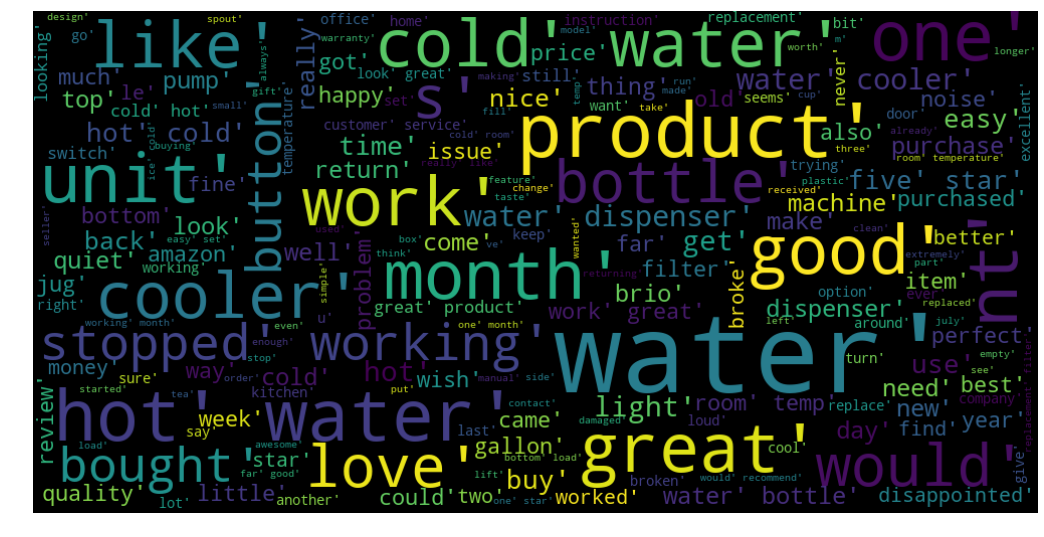

In [30]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Getting only Unique Words**

In [0]:
speech_word_counts = Counter(lemma_words)

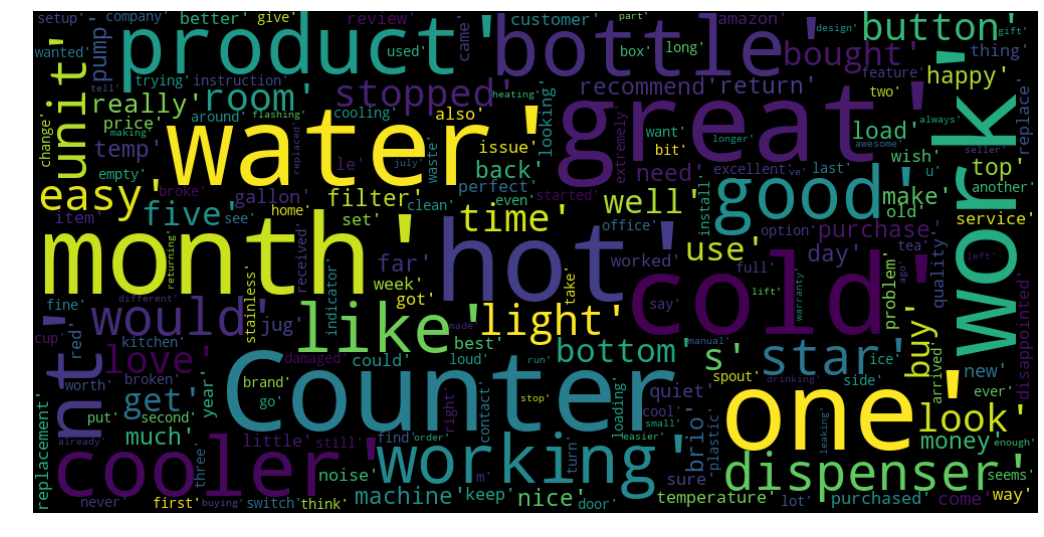

In [32]:
filtered_speech_words = str(speech_word_counts)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Plotting 20 most top words**

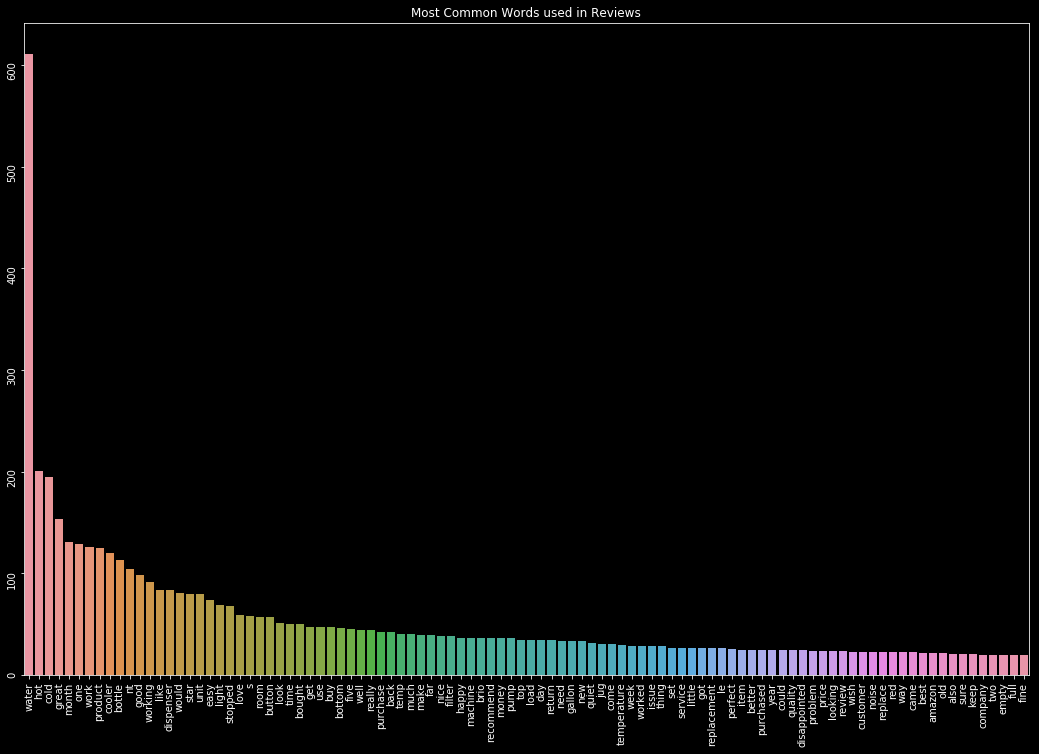

In [33]:
rr_common_words = [word[0] for word in speech_word_counts.most_common(100)]
rr_common_counts = [word[1] for word in speech_word_counts.most_common(100)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(18, 12))

sns.barplot(x=rr_common_words, y=rr_common_counts)
plt.title('Most Common Words used in Reviews')
plt.tick_params(axis ='x', rotation = 90)
plt.tick_params(axis ='y', rotation = 90)
plt.show()

In [0]:
df=pd.DataFrame(speech_word_counts.most_common(100))

In [0]:
df.to_excel('amazon_common_100.xlsx')

**Sentiments Using TextBlob**

In [0]:
speech_text_object = TextBlob(filtered_speech_words)

In [36]:
speech_text_object.sentiment

Sentiment(polarity=0.1971592690574171, subjectivity=0.6790162586613204)

**Plotting words by their sentiments.**

In [0]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in lemma_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

**Plotting Bigrams**

In [0]:
from nltk.util import ngrams

In [38]:
print(text)

 one star the arrives five stars awesome item ! it’s nice to have unlimited water it’s nice to have unlimited water. think there is to many filters for me because the water tastes like distilled water which makes myself more thirsty. other than that i am happy for the most part. "read and follow" the instructions for setup to avoid any problems with the setup. we ordered 2 of these water dispenser and coolers for our company - one of the office and one for our warehouse work area to fill the need of water supply for 2 large groups of employees in two separate work areas. trying to eliminate the chore of having to purchase cases of bottle water several times a week! set up a water delivery service and decided it would be better to purchase the cooler rather than paying a monthly rental fee on top of the water delivery service! turns out to be a wise and cost effective purchase. this is a well known brand and has been very welcomed in the office. unpacked, plugged in, loaded a bottle of 

In [0]:
import itertools

In [0]:
def ngrams_wrapper(sent):
    return list(nltk.ngrams(sent, 2))

In [0]:
sentences = nltk.sent_tokenize(text)

In [0]:
tokenized = map(nltk.tokenize.word_tokenize, sentences)

In [0]:
bigrams = map(ngrams_wrapper, tokenized)

In [0]:
print(bigrams)

In [0]:
bigram = list(itertools.chain.from_iterable(bigrams))

In [0]:
freq_dist = nltk.FreqDist(bigram)

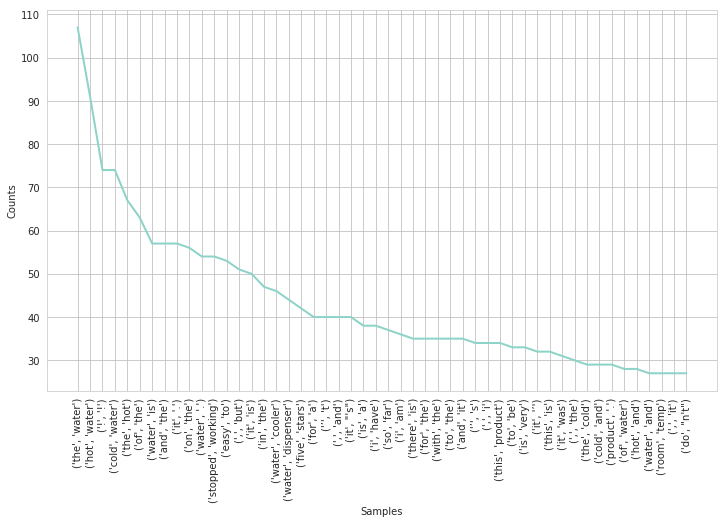

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
freq_dist.plot(50,cumulative=False)
plt.show()

In [0]:
bigrams_7 = map(ngrams_wrapper_2, tokenized)

In [0]:
bigram_7 = list(itertools.chain.from_iterable(bigrams_7))

In [0]:
freq_dist_7 = nltk.FreqDist(bigram_7)

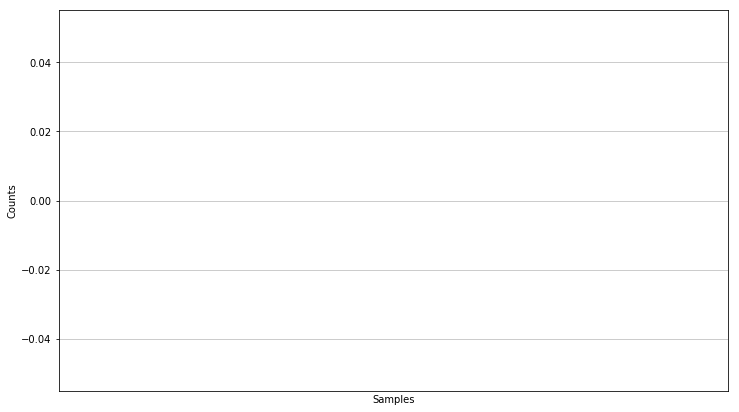

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_7.plot(50,cumulative=False)
plt.show()

In [0]:
prob_dist = nltk.MLEProbDist(freq_dist)

**Bigrams on Lemma Words**

In [0]:
bigrams_2 = map(ngrams_wrapper, lemma_words)

In [0]:
print(lemma_words)

['Everybody', 'come', 'house', 'comment', 'refreshingly', 'cool', 'water', 'cooler', 'Very', 'nice', 'looking', 'Also', 'quiet', 'It', 'worked', 'fine', 'first', 'day', 'stopped', 'working', 'next', 'After', 'checking', 'filling', 'water', 'ect', 'still', 'could', 'get', 'work', 'right', 'sometimes', 'got', 'water', 'others', 'time', 'would', 'We', 'return', 'Since', 'gift', 'ended', 'replaceing', 'one', 'store', 'near', 'The', 'unit', 'work', 'well', 'I', 'read', 'hot', 'cold', 'unit', 'leaked', 'want', 'one', 'Hard', 'find', 'type', 'unit', 'Cold', 'It', 'work', 'well', 'better', 'last', 'attachment', 'add', 'bottle', 'turned', 'upside', 'This', 'easy', 'clean', 'attachment', 'The', 'price', 'however', 'double', 'I', 'paid', 'last', 'one', 'Costco', 'Hard', 'find', 'cold', 'unit', 'I', 'hesitation', 'recommending', 'afford', 'Works', 'Great', 'Works', 'without', 'power', 'Works', 'like', 'charm', 'easy', 'set', 'use', 'took', 'camp', 'work', 'well', 'Great', 'Juice', 'way', 'get', 'w

In [0]:
bigram_2 = list(itertools.chain.from_iterable(bigrams_2))

In [0]:
freq_dist_2 = nltk.FreqDist(bigram_2)

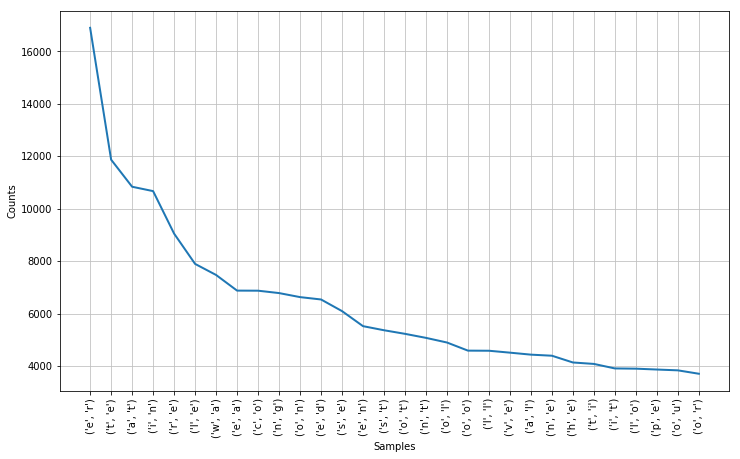

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_2.plot(30,cumulative=False)
plt.show()

**Bigrams on Stemmed words**

In [0]:
def ngrams_wrapper_2(sent):
    return list(nltk.ngrams(sent, 5))

In [0]:
bigrams_3 = map(ngrams_wrapper_2, stemmed_words)

In [0]:
bigram_3 = list(itertools.chain.from_iterable(bigrams_3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [0]:
freq_dist_3 = nltk.FreqDist(bigram_3)

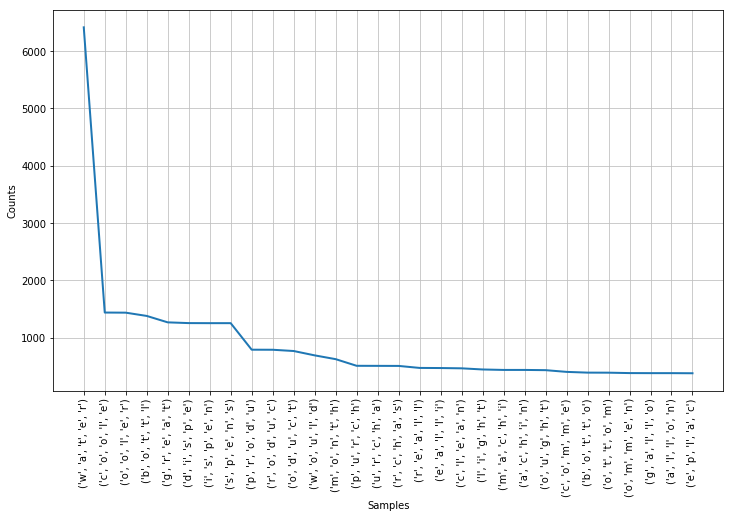

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_3.plot(30,cumulative=False)
plt.show()

In [0]:
https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a
https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184

**Bigram on Filtered words, removing punctuation**

In [0]:
filtered_words

In [0]:
bigrams_100 = map(ngrams_wrapper, filtered_words)

In [0]:
bigram_100 = list(itertools.chain.from_iterable(bigrams_100))

In [0]:
freq_dist_100 = nltk.FreqDist(bigram_100)

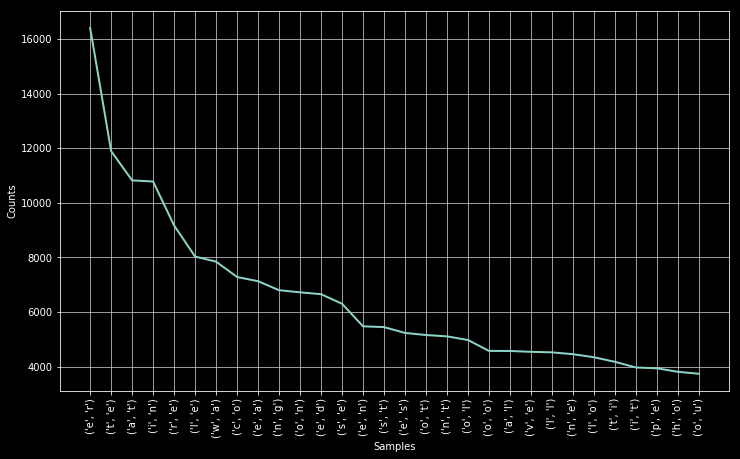

In [0]:
plt.figure(figsize=(12, 7))
freq_dist_100.plot(30,cumulative=False)
plt.show()

**Polarity for each comment**

In [0]:
data5=data1.comb_review

In [0]:
list5=[]
a=""
for w in data5:
  a=str(w).lower()
  list5.append(a)




In [0]:
print(list5[0])

everybody that comes to my house comments on how refreshingly cool the water is from this cooler..  very nice looking. also very quiet.


In [49]:
len(list5)

446

In [50]:
data1.shape

(446, 33)

In [51]:
senti=[]
for i in list5:
  speech_text_object_2 = TextBlob(str(i))
  senti.append(speech_text_object_2.sentiment.polarity)
print(senti)
  

[0.0, 1.0, 0.48214285714285715, 0.40373883928571436, 0.1969827586206897, 0.45, 0.24, 0.21901881720430105, 0.2727272727272727, 0.28333333333333327, 0.390625, 0.4590909090909091, 0.4000000000000001, -0.24305555555555558, 0.07000000000000002, 0.0, 0.3046875, 0.625, 0.3013888888888889, -0.19523809523809524, 0.2384444444444444, 0.42499999999999993, 0.05714285714285715, -0.06874999999999999, -0.30000000000000004, 0.04428571428571429, 0.325625, 0.20666666666666664, 0.3833333333333333, -0.045000000000000005, 0.7816666666666667, 0.55, -0.5833333333333334, 0.0, 0.8, 0.2375, 0.004999999999999988, 0.40785123966942155, 0.45, 0.47857142857142854, 0.6, 0.16396825396825399, 0.0, 0.30000000000000004, 0.3571428571428571, 0.0548076923076923, 0.5623412698412699, 0.3305952380952381, 0.3035281385281385, -0.030555555555555565, 0.3375, -0.1, -0.0338888888888889, 0.1711111111111111, 0.22053571428571425, 0.19, 0.12272727272727274, 0.07500000000000001, 0.0, 0.13240740740740742, -0.75, 0.0, 0.8, 0.55, 0.055583333

In [52]:
len(senti)

446

In [0]:
bond=data1

In [54]:
bond.head(2)

,ugam_id,site_category_Path,Retailer,Division,Category,Department,Class,Subclass,Product_URL,Brand,Product_Name,Unique_Product_Identifier_Mainproduct,Unique_Product_Identifier_Variant,Final_Price_after_Discount,Extraction_Date,Review_Link,Review_Header,Review_Creation_Date,Review_From,Review_By,Review_Helpful_Votes,Review_Total_Votes,Review_Rating_Score,Review_Rating_Scale,Review_Reviewers_Badges,Review_Text,Review_Count_Of_Comments,Review_Verified_Purchase,Reviewer_Age,Reviewer_Gender,Review_Count,Product_reviews,comb_review
0,25,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Water-Co...,Brio,"Brio Essential Series Top Load Hot, Cold & Roo...",B06Y4GN6H3,NaN,159.99,2019-02-12 12:02:51,https://www.amazon.com/product-reviews/B06Y4GN...,One Star,"April 1, 2018",NaN,NaN,1,NaN,1,5,NaN,The arrives,0,Yes,NaN,NaN,NaN,118,One Star The arrives
1,26,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Bottom-C...,Brio,"Brio Essential Series Bottom Load Hot, Cold & ...",B06Y4HNLS2,NaN,NaN,2019-02-12 12:02:41,https://www.amazon.com/product-reviews/B06Y4HN...,Five Stars,"April 10, 2018",NaN,NaN,0,NaN,5,5,NaN,Awesome item !,0,Yes,NaN,NaN,NaN,286,Five Stars Awesome item !


In [0]:
bond["Polarity"]=senti

In [56]:
bond.tail(2)

,ugam_id,site_category_Path,Retailer,Division,Category,Department,Class,Subclass,Product_URL,Brand,Product_Name,Unique_Product_Identifier_Mainproduct,Unique_Product_Identifier_Variant,Final_Price_after_Discount,Extraction_Date,Review_Link,Review_Header,Review_Creation_Date,Review_From,Review_By,Review_Helpful_Votes,Review_Total_Votes,Review_Rating_Score,Review_Rating_Scale,Review_Reviewers_Badges,Review_Text,Review_Count_Of_Comments,Review_Verified_Purchase,Reviewer_Age,Reviewer_Gender,Review_Count,Product_reviews,comb_review,Polarity
444,26,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Bottom-C...,Brio,"Brio Essential Series Bottom Load Hot, Cold & ...",B06Y4HNLS2,NaN,NaN,2019-02-12 12:02:41,https://www.amazon.com/product-reviews/B06Y4HN...,It stopped working practically new,"September 5, 2018",NaN,NaN,1,NaN,1,5,NaN,Not good bearly bought it in July only 2 month...,1,Yes,NaN,NaN,NaN,286,It stopped working practically new Not good be...,0.022727
445,26,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Bottom-C...,Brio,"Brio Essential Series Bottom Load Hot, Cold & ...",B06Y4HNLS2,NaN,NaN,2019-02-12 12:02:41,https://www.amazon.com/product-reviews/B06Y4HN...,Disappointed purchase,"September 5, 2018",NaN,NaN,0,NaN,1,5,NaN,I’ve used Brio before and had no issues. I was...,1,Yes,NaN,NaN,NaN,286,Disappointed purchase I’ve used Brio before an...,-0.080000


In [0]:
bond.to_excel('varad_1.xlsx')

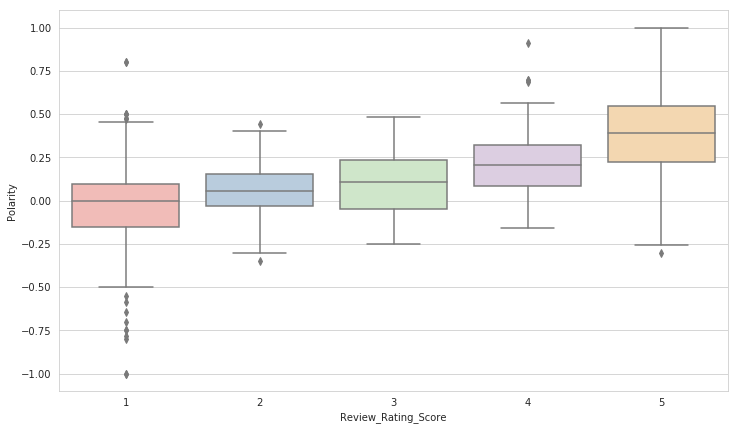

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Polarity',data=bond,palette='Pastel1',color='white')

In [0]:
bond.shape

(4157, 33)

In [58]:
sub=[]
for i in list5:
  speech_text_object_3 = TextBlob(str(i))
  sub.append(speech_text_object_3.sentiment.subjectivity)
print(sub)
  

[0.0, 1.0, 0.6964285714285714, 0.4910714285714286, 0.6810344827586207, 0.875, 0.38285714285714284, 0.5444168734491315, 0.609090909090909, 0.9083333333333333, 0.55, 0.7386363636363636, 0.45, 0.8180555555555555, 0.8400000000000001, 0.0, 0.7302083333333332, 0.5, 0.5888888888888889, 0.6158730158730158, 0.5336666666666667, 0.44666666666666677, 0.8035714285714286, 0.7791666666666668, 0.39999999999999997, 0.5642857142857144, 0.609375, 0.38666666666666666, 0.475, 0.6583333333333333, 1.0, 0.9375, 0.75, 0.8, 0.75, 0.7375, 0.4991666666666667, 0.5898071625344353, 0.4875, 0.65, 0.95, 0.6298941798941798, 0.0, 0.425, 0.5357142857142857, 0.7153846153846154, 0.8031746031746033, 0.5557142857142857, 0.7016697588126161, 0.49444444444444435, 0.625, 0.1, 0.5222222222222221, 0.578080808080808, 0.65625, 0.6, 0.5145687645687645, 0.38333333333333336, 0.19999999999999998, 0.3148148148148148, 0.75, 0.0, 0.75, 0.42500000000000004, 0.6041666666666667, 0.569047619047619, 0.6375, 0.1611111111111111, 0.1, 0.7111111111

In [0]:
bond["Subjectivity"]=sub

In [60]:
bond.head(5)

,ugam_id,site_category_Path,Retailer,Division,Category,Department,Class,Subclass,Product_URL,Brand,Product_Name,Unique_Product_Identifier_Mainproduct,Unique_Product_Identifier_Variant,Final_Price_after_Discount,Extraction_Date,Review_Link,Review_Header,Review_Creation_Date,Review_From,Review_By,Review_Helpful_Votes,Review_Total_Votes,Review_Rating_Score,Review_Rating_Scale,Review_Reviewers_Badges,Review_Text,Review_Count_Of_Comments,Review_Verified_Purchase,Reviewer_Age,Reviewer_Gender,Review_Count,Product_reviews,comb_review,Polarity,Subjectivity
0,25,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Water-Co...,Brio,"Brio Essential Series Top Load Hot, Cold & Roo...",B06Y4GN6H3,NaN,159.99,2019-02-12 12:02:51,https://www.amazon.com/product-reviews/B06Y4GN...,One Star,"April 1, 2018",NaN,NaN,1,NaN,1,5,NaN,The arrives,0,Yes,NaN,NaN,NaN,118,One Star The arrives,0.000000,0.000000
1,26,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Bottom-C...,Brio,"Brio Essential Series Bottom Load Hot, Cold & ...",B06Y4HNLS2,NaN,NaN,2019-02-12 12:02:41,https://www.amazon.com/product-reviews/B06Y4HN...,Five Stars,"April 10, 2018",NaN,NaN,0,NaN,5,5,NaN,Awesome item !,0,Yes,NaN,NaN,NaN,286,Five Stars Awesome item !,1.000000,1.000000
2,28,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Commercial-Bottlel...,Brio,Brio Commercial Grade Bottleless Ultra Safe Re...,B079J4S6VT,NaN,274.99,2019-02-12 12:02:39,https://www.amazon.com/product-reviews/B079J4S...,It’s nice to have unlimited water,"April 10, 2018",NaN,NaN,1,NaN,3,5,NaN,It’s nice to have unlimited water. Think there...,0,Yes,NaN,NaN,NaN,42,It’s nice to have unlimited water It’s nice to...,0.482143,0.696429
3,25,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Water-Co...,Brio,"Brio Essential Series Top Load Hot, Cold & Roo...",B06Y4GN6H3,NaN,159.99,2019-02-12 12:02:51,https://www.amazon.com/product-reviews/B06Y4GN...,"""READ AND FOLLOW"" the Instructions for setup t...","April 11, 2018",NaN,NaN,11,NaN,5,5,NaN,We ordered 2 of these water dispenser and cool...,0,Yes,NaN,NaN,NaN,118,"""READ AND FOLLOW"" the Instructions for setup t...",0.403739,0.491071
4,25,Tools & Home Improvement#||#Kitchen & Bath Fix...,Amazon,Tools & Home Improvement,Kitchen & Bath Fixtures,Kitchen Fixtures,Water Dispensers & Coolers,Water Dispensers,https://www.amazon.com/Brio-Essential-Water-Co...,Brio,"Brio Essential Series Top Load Hot, Cold & Roo...",B06Y4GN6H3,NaN,159.99,2019-02-12 12:02:51,https://www.amazon.com/product-reviews/B06Y4GN...,... for our home for a long time and so happy ...,"April 12, 2018",NaN,NaN,4,NaN,4,5,NaN,Been on the market for a water dispenser for o...,0,Yes,NaN,NaN,NaN,118,... for our home for a long time and so happy ...,0.196983,0.681034


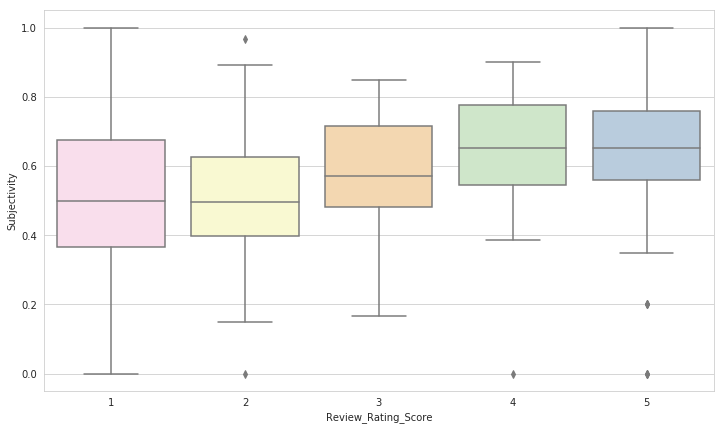

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Subjectivity',data=bond,palette='Pastel1_r',color='white')

**Polarity of Unique Words, use this**

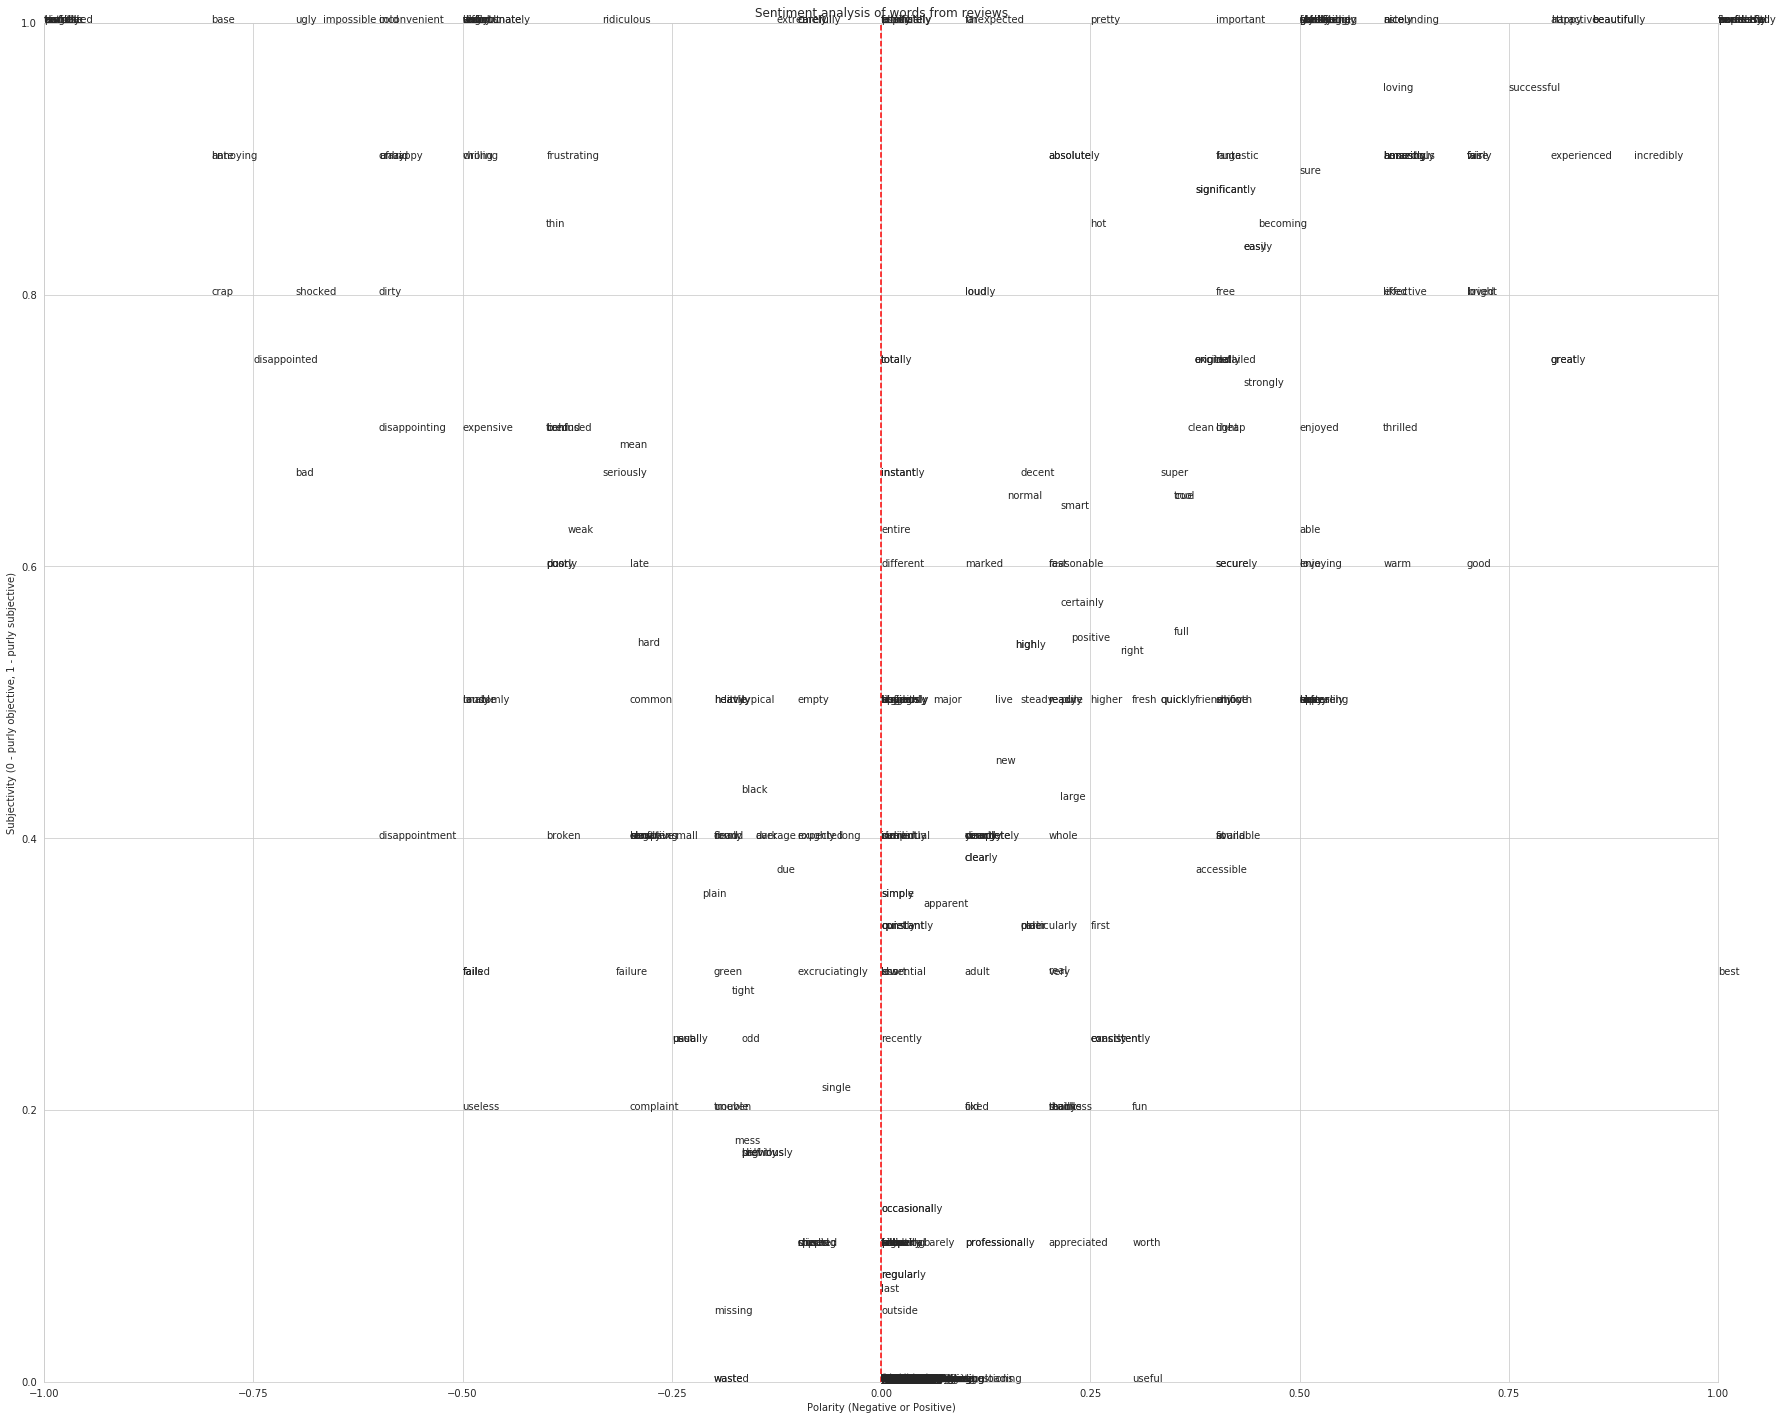

In [62]:
plt.figure(figsize=(30,25))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in speech_word_counts:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from reviews')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

In [0]:
bond.to_excel('combined_pol_sub.xlsx')

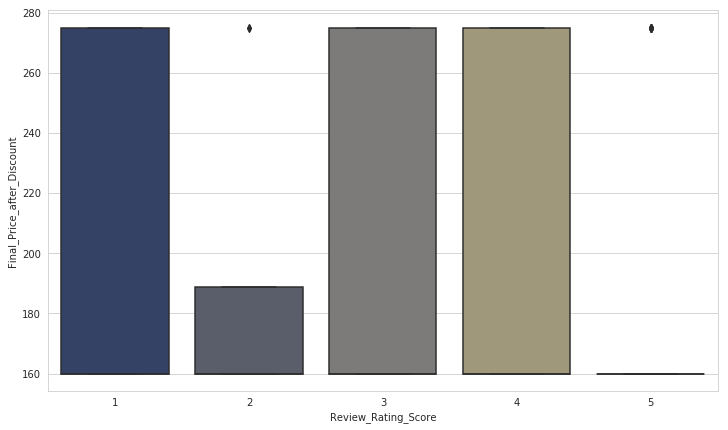

In [65]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Review_Rating_Score',y='Final_Price_after_Discount',data=bond,palette='cividis',color='white')

**Trying NER, not possible due to large number of Characters**

In [0]:
import spacy

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
doc = nlp(text)

In [0]:
for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 

Text(0.5, 1.0, 'Ratings on Amazon')

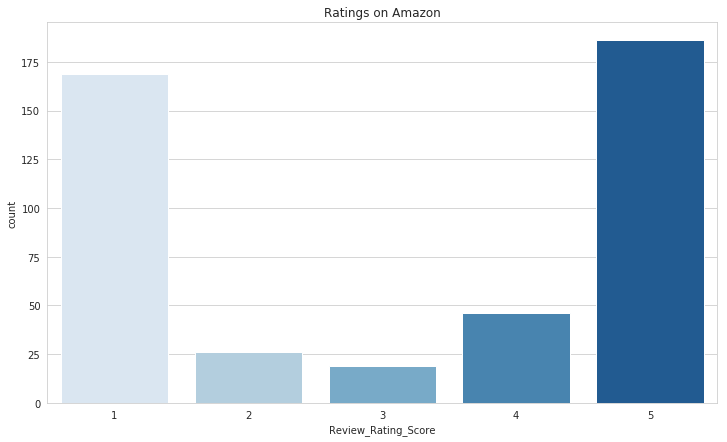

In [78]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Review_Rating_Score',data=bond, palette='Blues')
plt.title('Ratings on Amazon')

In [0]:
bond.to_excel('amazon_pol_sub.xlsx')